# Colab Lib installation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 M

In [3]:
!pip install diffusers transformers accelerate scipy safetensors 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.1 MB/s eta 0:00:00


In [4]:
!pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 52.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rembg 2.0.30 requires pillow~=9.3.0, but you have pillow 9.0.0 which is incompatible.


# Prompt testing

Because I had limited resources, I used the Stable Diffusion model (1.4). However, there are several issues with prompts: Choosing a sentence such that the model understands you is a separate art form. 

So I decided to generate all the model is capable of. If some classes cannot be generated by the model, I will use photos from the Internet.

In [5]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "CompVis/stable-diffusion-v1-4"


# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

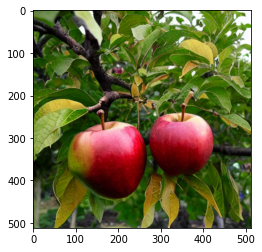

In [15]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

prompt = "fully dark red long apple. type 'red delicious'. photo"
image = pipe(prompt).images[0]

plt.imshow(np.array(image))

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 71.2GB/s]


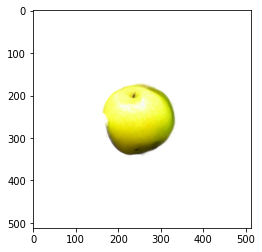

In [7]:
from rembg import remove


alpha_matting: bool = True,
# alpha_matting_foreground_threshold: int = 240,
# alpha_matting_background_threshold: int = 10,
# alpha_matting_erode_size: int = 10,
morph = remove(np.array(image), alpha_matting=True)

plt.imshow(morph)

# Generation

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as wgts
from IPython.display import display, clear_output
from rembg import remove

In [9]:
from dataclasses import dataclass
from typing import Dict, Union, Any
from pathlib import Path

@dataclass
class ClassPromt:
    ind: int
    name: str
    promt: str


class GenWidget:
    def __init__(self, class_promts: Dict[int, ClassPromt], save_path: Union[str, Path], gen_pipe: Any) -> None:
        self.img = np.zeros((512, 512, 3), dtype=np.uint8)
        self.annot = np.zeros((512, 512, 4), dtype=np.uint8)
        self.save_ind = 0
        self.save_path = Path(save_path)
        self.promts = class_promts
        self.gen_pipe = gen_pipe
        self.cl_num = wgts.Dropdown(options=[(p.name, p.ind) for p in class_promts.values()], description='Generate class')
        self.save_as = wgts.Dropdown(options=[(p.name, p.ind) for p in class_promts.values()], description='Save As')
        self.alpha_matting = wgts.Dropdown(options=[False, True], value=False)
        self.alpha_matting_foreground_threshold = wgts.IntSlider(min=100, max=255, value=240)
        self.alpha_matting_background_threshold = wgts.IntSlider(min=5, max=100, value=10)
        self.alpha_matting_erode_size = wgts.IntSlider(min=1, max=50, value=10)
    
    def cv2_write(self, *args):
        cln = self.save_as.value
        type_img = self.promts[cln].name
        save_path = self.save_path / type_img
        save_path.mkdir(parents=True, exist_ok=True)
        name = f"{type_img}_{self.save_ind}.png"
        self.save_ind += 1
        cv2.imwrite(
            str(save_path / name), 
            cv2.cvtColor(self.annot, cv2.COLOR_RGBA2BGRA)
        )


    def _show_img(self, cls_n):
        out = wgts.Output()
        img_class = self.promts[cls_n].name
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))
        ax[0].imshow(self.img)
        ax[1].imshow(self.annot)
        fig.suptitle(img_class)
        with out:
            clear_output(wait=True)
            display(fig)
    
    def show_img(
        self,
        alpha_matting: bool,
        foreground_threshold: int,
        background_threshold: int,
        erode_size: int,
        cls_n: int
    ):
        self.annot = remove(
            self.img,
            alpha_matting=alpha_matting,
            alpha_matting_foreground_threshold=foreground_threshold,
            alpha_matting_background_threshold=background_threshold,
            alpha_matting_erode_size=erode_size,
        )
        self._show_img(cls_n)
    
    def generate(self, *args):
        cls_n = self.cl_num.value
        promt = self.promts[cls_n]
        self.img = self.gen_pipe(promt.promt).images[0]
        self.img = np.array(self.img)

    
    def show(self) -> None:
        save_b = wgts.Button(description="Save", layout=wgts.Layout(width="30%"))
        gen_b = wgts.Button(description="Generate", layout=wgts.Layout(width="30%"))
        gen_b.on_click(self.generate)
        save_b.on_click(self.cv2_write)
        btns = wgts.HBox(children=[gen_b, save_b])
        display(btns)
        display(self.save_as)
        wgts.interact(
            self.show_img,
            alpha_matting=self.alpha_matting,
            foreground_threshold=self.alpha_matting_foreground_threshold,
            background_threshold=self.alpha_matting_background_threshold,
            erode_size=self.alpha_matting_erode_size,
            cls_n=self.cl_num
        )


In [12]:
classes = {
    0: ClassPromt(0, "red_green_apple", "red and green apple without background. type 'mcintosh'. photo"),
    1: ClassPromt(1, "red_apple", "fully dark red apple. type 'red delicious'. photo"),
    2: ClassPromt(2, "striped_apple", "striped red apple photo"),
    3: ClassPromt(3, "green_apple", "green apple without background. type 'granny smith'. photo"),
    4: ClassPromt(4, "red_yellow_apple", "yellow apple with red spots. type 'fuji'. photo"),
    5: ClassPromt(5, "golden_apple", "yellow apple without background. type 'golden delicious'"),
}

gw = GenWidget(
    class_promts=classes,
    gen_pipe=pipe,
    save_path="/content/drive/MyDrive/Colab_Notebooks/interview_ass/supervisely/prim",
    # save_path="./prim",
)


In [23]:
# After generation you should change any parameter
# to rerender image
gw.show()

Dropdown(description='Save As', index=5, options=(('red_green_apple', 0), ('red_apple', 1), ('striped_apple', …

interactive(children=(Dropdown(description='alpha_matting', options=(False, True), value=False), IntSlider(val…